In [1]:
# -- 将数据框命名为titanic
# -- 将PassengerId设置为索引
# -- 绘制一个展示男女乘客比例的扇形图
# -- 绘制一个展示船票Fare, 与乘客年龄和性别的散点图
# -- 有多少人生还？
# -- 绘制一个展示船票价格的直方图

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#将数据框命名为titanic
titanic = pd.read_csv('data/train.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
#将PassengerId设置为索引
titanic = titanic.set_index('PassengerId')
titanic.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

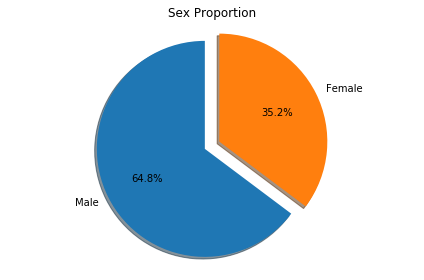

In [24]:
#绘制一个展示男女乘客比例的扇形图
Male = (titanic.Sex == 'male').sum()
Female = (titanic.Sex == 'female').sum()
# female = titanic.query('Sex=="female"')
proportions= [Male,Female]
plt.pie(proportions,labels=['Male','Female'],shadow=True,
       autopct='%1.1f%%',startangle=90,explode=(0.15,0))
plt.axis('equal')
plt.title('Sex Proportion')
plt.tight_layout()
plt.show()

(-5, 85)

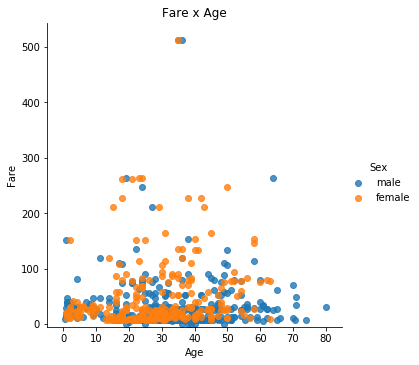

In [29]:
#绘制一个展示船票Fare, 与乘客年龄和性别的散点图
lm = sns.lmplot(x='Age',y='Fare',data=titanic,hue='Sex',fit_reg=False)
lm.set(title='Fare x Age')
#设置坐标轴取值范围
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

In [30]:
#有多少人生还？
titanic.Survived.sum()

342

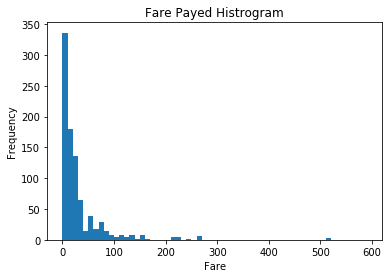

In [35]:
#绘制一个展示船票价格的直方图
df = titanic.Fare.sort_values(ascending=False)
plt.hist(df,bins=(np.arange(0,600,10)))
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()